In [1]:
import functions as f
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/train1.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,39.0,0,5,29.1250,0,1,0,0
708,887,0,2,27.0,0,0,13.0000,0,0,1,1
709,888,1,1,19.0,0,0,30.0000,0,0,1,0
710,890,1,1,26.0,0,0,30.0000,1,0,0,1


## Divide training and test groups

In [6]:
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

## Scale data

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-Nearest Neighbors

### Original data

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test, y_test)

0.6713286713286714

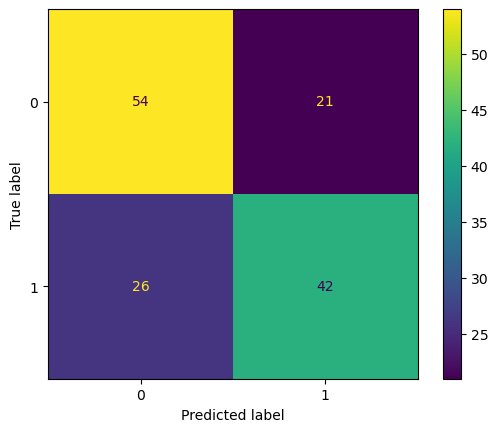

In [15]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### Scaled data

In [16]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
knn_scaled.score(X_test_scaled, y_test)

0.7412587412587412

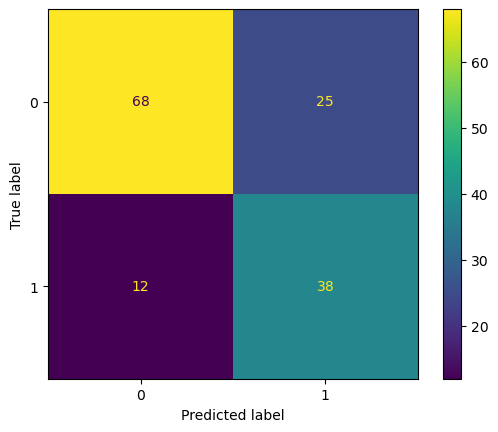

In [19]:
y_pred = knn_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Predict and export results

In [4]:
test = pd.read_csv('src/test.csv')

In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
test = f.clean_test(test)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,male
12,904,1,23.0,1,0,82.2667,0,0,1,0
14,906,1,47.0,1,0,61.1750,0,0,1,0
24,916,1,48.0,1,3,262.3750,1,0,0,0
26,918,1,22.0,0,1,61.9792,1,0,0,0
28,920,1,41.0,0,0,30.5000,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
404,1296,1,43.0,1,0,27.7208,1,0,0,1
405,1297,2,20.0,0,0,13.8625,1,0,0,1
407,1299,1,50.0,1,1,211.5000,1,0,0,1
411,1303,1,37.0,1,0,90.0000,0,1,0,0


In [24]:
test_scaled = scaler.transform(test.drop(columns=['PassengerId']))

In [26]:
y_pred = knn_scaled.predict(test_scaled)

In [29]:
test['PassengerId']

12      904
14      906
24      916
26      918
28      920
       ... 
404    1296
405    1297
407    1299
411    1303
414    1306
Name: PassengerId, Length: 87, dtype: int64

In [27]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [30]:
results = pd.DataFrame({
    "PassengerId":test['PassengerId'],
    "Survived":y_pred
})

In [38]:
results

,Survived
PassengerId,
904,1
906,1
916,1
918,1
920,0
...,...
1296,1
1297,0
1299,1


In [36]:
results.set_index('PassengerId', inplace=True)

In [37]:
results.to_csv('results/knn_result1.csv')